In [34]:
# Paqueterias
import numpy as np
# import math as mt
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import odeint
from matplotlib.ticker import FuncFormatter

In [35]:
# Constantes
h = 0.7 # H0/(100 km/s/Mpc)
Neff = 3.045
Mnu = 0.06
# Ages
# Hubble constant in Mpc
H0_Mpc = 1/(2997.92458/h)
# Mpc in years
Mpc_yr = 3.262e6
# Hubble constant in years
H0_yr = H0_Mpc/Mpc_yr
# Abundances today
# Photons CMB
Og0 = 2.469e-5/(h**2)
# Primordial (massless) neutrino
Onu0 = (7/8)*(4/11)**(4/3)*Neff*Og0
# Radiation
Or0 = Og0 + Onu0
# Baryons
Ob0 = 0.05
# CDM
Oc0 = 0.25
# Matter
Om0 = Ob0 + Oc0
# Curvature
Ok0 = 0
# Dark energy
Ol0 = 1 - Or0 - Om0 - Ok0
# Variables
# Scale factor a
a_min = 1e-5
a_max = 10
# a_arr = np.arange(a_min,a_max,0.001)
a_arr = np.linspace(a_min,a_max,2000000)
# Redshift
z_arr = 1/a_arr - 1
# Time
t_arr = np.linspace(0, 10, 2000000)

In [36]:
# Different important redshifts
# Radiation-Matter equality
a_eq1 = Or0/Om0
z_eq1 = 1/a_eq1 - 1
# Matter-Dark Energy equality
a_eq2 = (Om0/Ol0)**(1/3)
z_eq2 = 1/a_eq2 - 1
# Epoch of CMB
z_cmb = 1100
a_cmb = 1/(1 + z_cmb)

## Epochs of equivalence

In [37]:
print(f"La epoca de eq. entre materia y energía oscura ocurrió en: z = {z_eq1} y a = {a_eq1}")
print(f"La epoca de eq. entre radiación y materia ocurrió en: z = {z_eq2} y a = {a_eq2}")

La epoca de eq. entre materia y energía oscura ocurrió en: z = 3518.7637580677197 y a = 0.00028410997690054635
La epoca de eq. entre radiación y materia ocurrió en: z = 0.3262985675969936 y a = 0.7539780441833802


## Cosmic energy densities $\rho_i$

In [38]:
# Critical density today
rho0_crit = 1.88e-26*h**2 # kg/m^3
# Cosmological densities (rho0_crit = 1)
# Matter 
def rhom(a):
    return Om0/(a**3)
# Radiation 
def rhor(a):
    return Or0/(a**4)
# Dark energy
rhol_arr = np.full_like(a_arr, Ol0)

In [39]:
# Especific densities
# CDM 
def rhoc(a):
    return Oc0/(a**3)
# Baryons 
def rhob(a):
    return Ob0/(a**3)
# Photons 
def rhog(a):
    return Og0/(a**4)
# Neutrino (massless) 
def rhonu(a):
    return Onu0/(a**4)

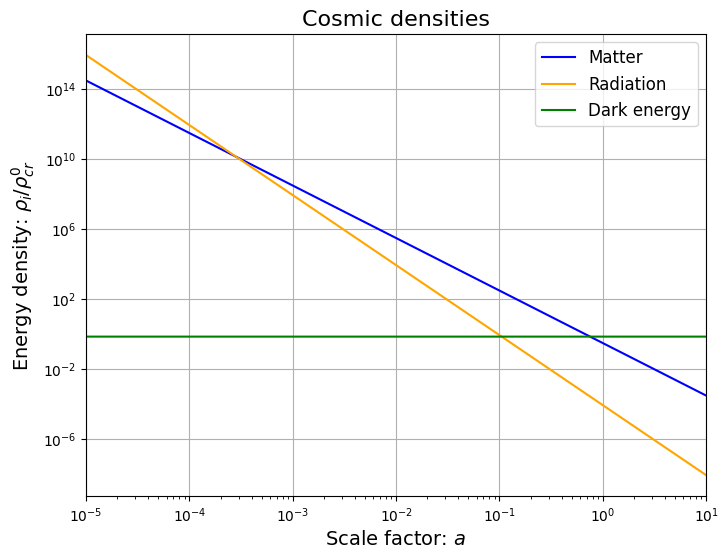

In [40]:
# Densities plot
plt.figure(figsize=(8, 6))
plt.plot(a_arr,rhom(a_arr),label='Matter', color = 'b')
plt.plot(a_arr,rhor(a_arr),label='Radiation', color='orange')
plt.plot(a_arr,rhol_arr,label='Dark energy', color='g')
plt.ylabel('Energy density: $\\rho_i/\\rho^0_{cr}$', fontsize=14)
plt.xlabel('Scale factor: $a$', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.xlim([np.min(a_arr), np.max(a_arr)])
plt.xscale('log')
plt.yscale('log')
plt.title(f"Cosmic densities", fontsize=16)
plt.grid()
plt.show()

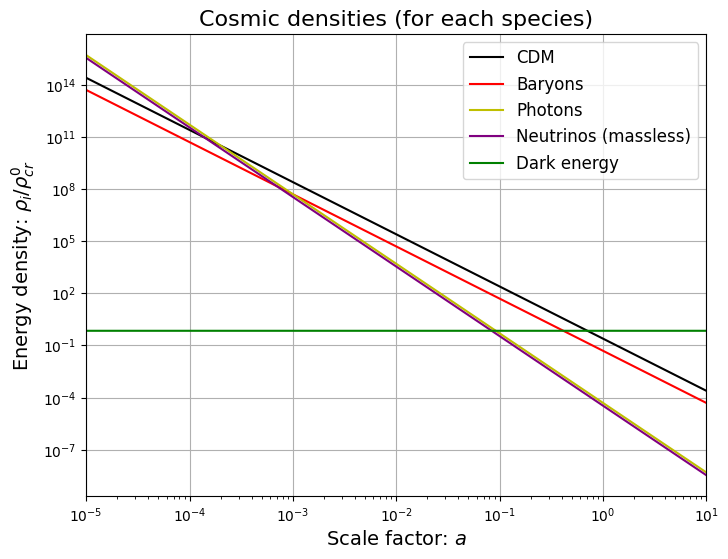

In [41]:
# Especific densities plot
plt.figure(figsize=(8, 6))
plt.plot(a_arr,rhoc(a_arr),label='CDM', color = 'black')
plt.plot(a_arr,rhob(a_arr),label='Baryons', color='red')
plt.plot(a_arr,rhog(a_arr),label='Photons', color='y')
plt.plot(a_arr,rhonu(a_arr),label='Neutrinos (massless)', color='purple')
plt.plot(a_arr,rhol_arr,label='Dark energy', color='g')
plt.ylabel('Energy density: $\\rho_i/\\rho^0_{cr}$', fontsize=14)
plt.xlabel('Scale factor: $a$', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.xlim([np.min(a_arr), np.max(a_arr)])
plt.xscale('log')
plt.yscale('log')
plt.title(f"Cosmic densities (for each species)", fontsize=16)
plt.grid()
plt.show()

## Hubble parameter $H(a)$

In [42]:
# Hubble parameter 1/(2997.92/h Mpc)
# General
def Hubble(a):
  return np.sqrt(Or0/(a**4) + Om0/(a**3) + Ol0)
# Radiation era
def Hr(a):
  return np.sqrt(Or0/(a**4))
# Matter era
def Hm(a):
  return np.sqrt(Om0/(a**3))
# Dark energy era
Hl_arr = np.full_like(a_arr, np.sqrt(Ol0))

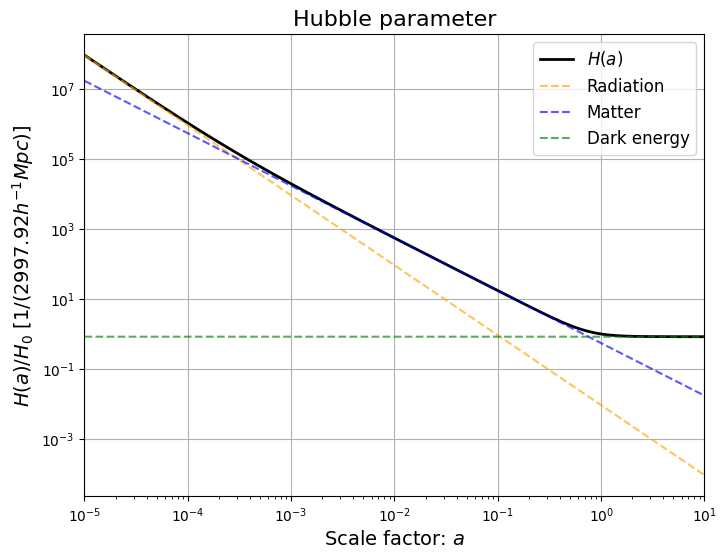

In [43]:
# Hubble plot
plt.figure(figsize=(8, 6))
plt.plot(a_arr,Hubble(a_arr),label='$H(a)$', color = 'black', linewidth=2)
plt.plot(a_arr,Hr(a_arr),label='Radiation', color = 'orange', linestyle='dashed', alpha=0.65)
plt.plot(a_arr,Hm(a_arr),label='Matter', color='b', linestyle='dashed', alpha=0.65)
plt.plot(a_arr,Hl_arr,label='Dark energy', color='g', linestyle='dashed', alpha=0.65)
plt.ylabel('$H(a)/H_0$ $[1/(2997.92h^{-1} Mpc)]$', fontsize=14)
plt.xlabel('Scale factor: $a$', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.xlim([np.min(a_arr), np.max(a_arr)])
plt.xscale('log')
plt.yscale('log')
plt.title(f"Hubble parameter", fontsize=16)
plt.grid()
plt.show()

## Dimensionless density parameter $\Omega_i$

In [44]:
# Dimensionless density parameters
# Matter 
def Om(a):
    return Om0*(1/Hubble(a))**2*a**(-3)
# Radiation 
def Or(a):
    return Or0*(1/Hubble(a))**2*a**(-4)
# Dark energy
def Ol(a):
    return Ol0*(1/Hubble(a))**2

In [45]:
# Especific
# CDM 
def Oc(a):
    return Oc0*(1/Hubble(a))**2*a**(-3)
# Baryons 
def Ob(a):
    return Ob0*(1/Hubble(a))**2*a**(-3)
# Photons 
def Og(a):
    return Og0*(1/Hubble(a))**2*a**(-4)
# Neutrinos (massless) 
def Onu(a):
    return Onu0*(1/Hubble(a))**2*a**(-4)

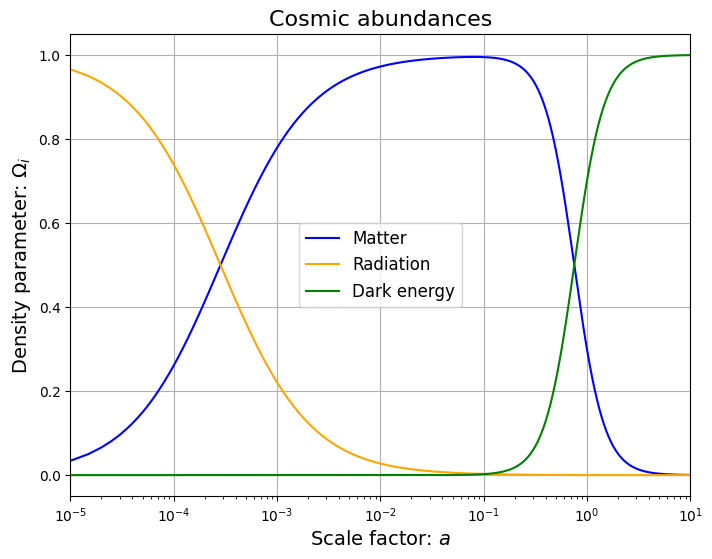

In [46]:
# Abundances plot
plt.figure(figsize=(8, 6))
plt.plot(a_arr,Om(a_arr),label='Matter', color = 'b')
plt.plot(a_arr,Or(a_arr),label='Radiation', color = 'orange')
plt.plot(a_arr,Ol(a_arr),label='Dark energy', color = 'g')
plt.ylabel('Density parameter: $\\Omega_i$', fontsize=14)
plt.xlabel('Scale factor: $a$', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.xlim([np.min(a_arr), np.max(a_arr)])
plt.xscale('log')
plt.title(f"Cosmic abundances", fontsize=16)
plt.grid()
plt.show()

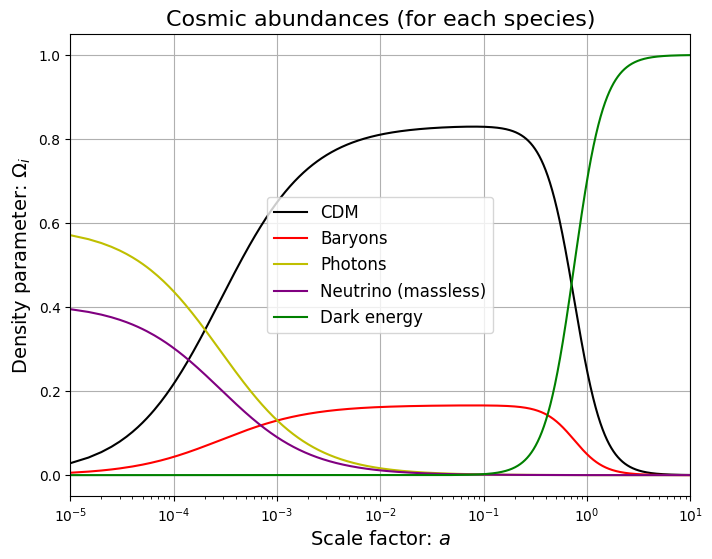

In [47]:
# Especific abundances plot
plt.figure(figsize=(8, 6))
plt.plot(a_arr,Oc(a_arr),label='CDM', color = 'black')
plt.plot(a_arr,Ob(a_arr),label='Baryons', color = 'red')
plt.plot(a_arr,Og(a_arr),label='Photons', color = 'y')
plt.plot(a_arr,Onu(a_arr),label='Neutrino (massless)', color = 'purple')
plt.plot(a_arr,Ol(a_arr),label='Dark energy', color = 'g')
plt.ylabel('Density parameter: $\\Omega_i$', fontsize=14)
plt.xlabel('Scale factor: $a$', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.xlim([np.min(a_arr), np.max(a_arr)])
plt.xscale('log')
plt.title(f"Cosmic abundances (for each species)", fontsize=16)
plt.grid()
plt.show()

## Ages of the universe

In [48]:
# Cosmic ages function
def t_0(x):
    t_0 = x/(np.sqrt(Or0 + Om0*x + Ol0*x**4 + Ok0*x**2))
    return t_0
# Age of the universe
time_universe = quad(t_0, 0, 1)[0]/H0_yr
# Time of eq1
time_eq1 = quad(t_0, 0, a_eq1)[0]/H0_yr
# Time of CMB (assuming is instantaneous)
time_LS = quad(t_0, 0, a_cmb)[0]/H0_yr
# Time of eq1
time_eq2 = quad(t_0, 0, a_eq2)[0]/H0_yr

In [49]:
# Value of H0 in 1/years
print(f'H0 = {H0_yr} 1/years')

H0 = 7.158027793951762e-11 1/years


In [50]:
# Important cosmic times
print(f'For cosmology: h = {h}')
print(f'Time of radiation-matter equality: {time_eq1} years')
print(f'Time of last scattering: {time_LS} years')
print(f'Time of matter-dark energy equality: {time_eq2} years')
print(f'Age of the universe: {time_universe} years')

For cosmology: h = 0.7
Time of radiation-matter equality: 47700.59243191363 years
Time of last scattering: 362523.16194659774 years
Time of matter-dark energy equality: 9806596517.277843 years
Age of the universe: 13463502812.428238 years


## Hubble parameter as a function of time $H(t)$

In [51]:
# Solution of Friedmann equation for a(t)
def odes(y,t_arr):
    at = y[0]
    dadt = at*np.sqrt(Om0*at**-3 + Or0*at**-4 + Ol0)
    return [dadt]
y0 = [1e-15**0.5]
y = odeint(odes,y0,t_arr)
# Solution a(t)
at = y[:,0]
# Derivate a'(t)
at_prime = at*np.sqrt(Om0*at**-3 + Or0*at**-4 + Ol0)
# Hubble parameter as a function H(t) = a'(t)/a(t)
Hubble_time = at_prime/at

In [52]:
# Compute the time t0
differences = np.abs(at - 1)
# Find the index where the difference is minimum
index = np.argmin(differences)
# Value of t0
t_0 = t_arr[index]
print(f't0 = {t_0}/H0')

t0 = 0.963720481860241/H0


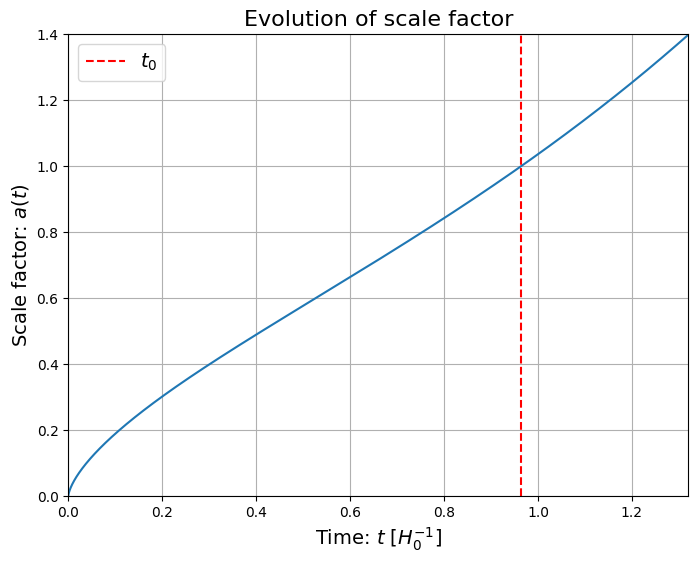

In [53]:
# Scale factor function plot
plt.figure(figsize=(8, 6))
plt.plot(t_arr, at)
plt.axvline(x=t_0, color='red', linestyle='--', label='$t_0$')
plt.ylabel('Scale factor: $a(t)$', fontsize=14)
plt.xlabel('Time: $t$ $[H_0^{-1}]$', fontsize=14)
plt.title(f"Evolution of scale factor", fontsize=16)
plt.xlim([np.min(t_arr), 1.32])
plt.ylim(0,1.4)
plt.legend(loc='best', fontsize=14)
plt.grid()
plt.show()

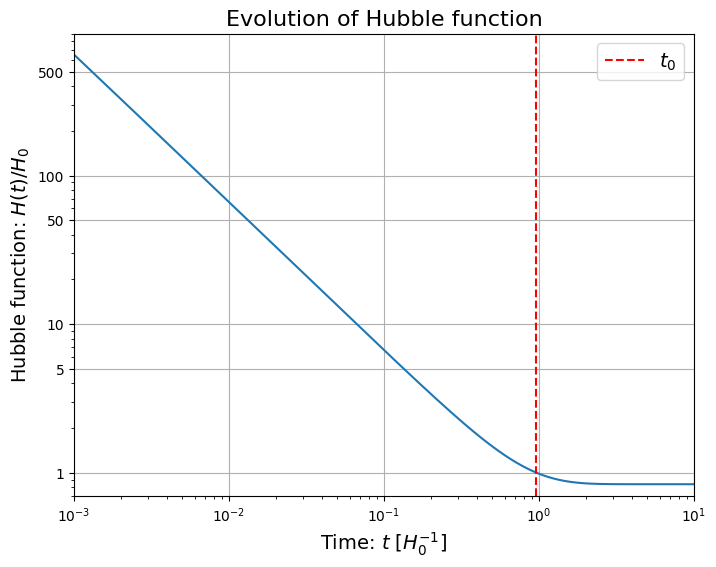

: 

In [54]:
# Scale custum format for y axis
def custom_formatter(y, pos):
    if y == 1:
        return '1'
    elif y == 5:
        return '5'
    elif y == 10:
        return '10'
    elif y == 50:
        return '50'
    elif y == 100:
        return '100'
    elif y == 500:
        return '500'
    else:
        return ''
# Hubble function plot
plt.figure(figsize=(8, 6))
plt.plot(t_arr, Hubble_time)
plt.axvline(x=t_0, color='red', linestyle='--', label='$t_0$')
plt.ylabel('Hubble function: $H(t)/H_0$', fontsize=14)
plt.xlabel('Time: $t$ $[H_0^{-1}]$', fontsize=14)
plt.title(f"Evolution of Hubble function", fontsize=16)
plt.xlim([0.001, 10])
plt.ylim([0.7, 900])
plt.grid()
plt.legend(loc='best', fontsize=14)
plt.gca().set_yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(custom_formatter))
plt.yticks([1, 5, 10, 50, 100, 500])
plt.xscale('log')